# Feature Selection - Filter and Wrapper Methods

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Dataset shape:", X.shape)
X.head(15)

Dataset shape: (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


## Filter Methods

### Correlation Method

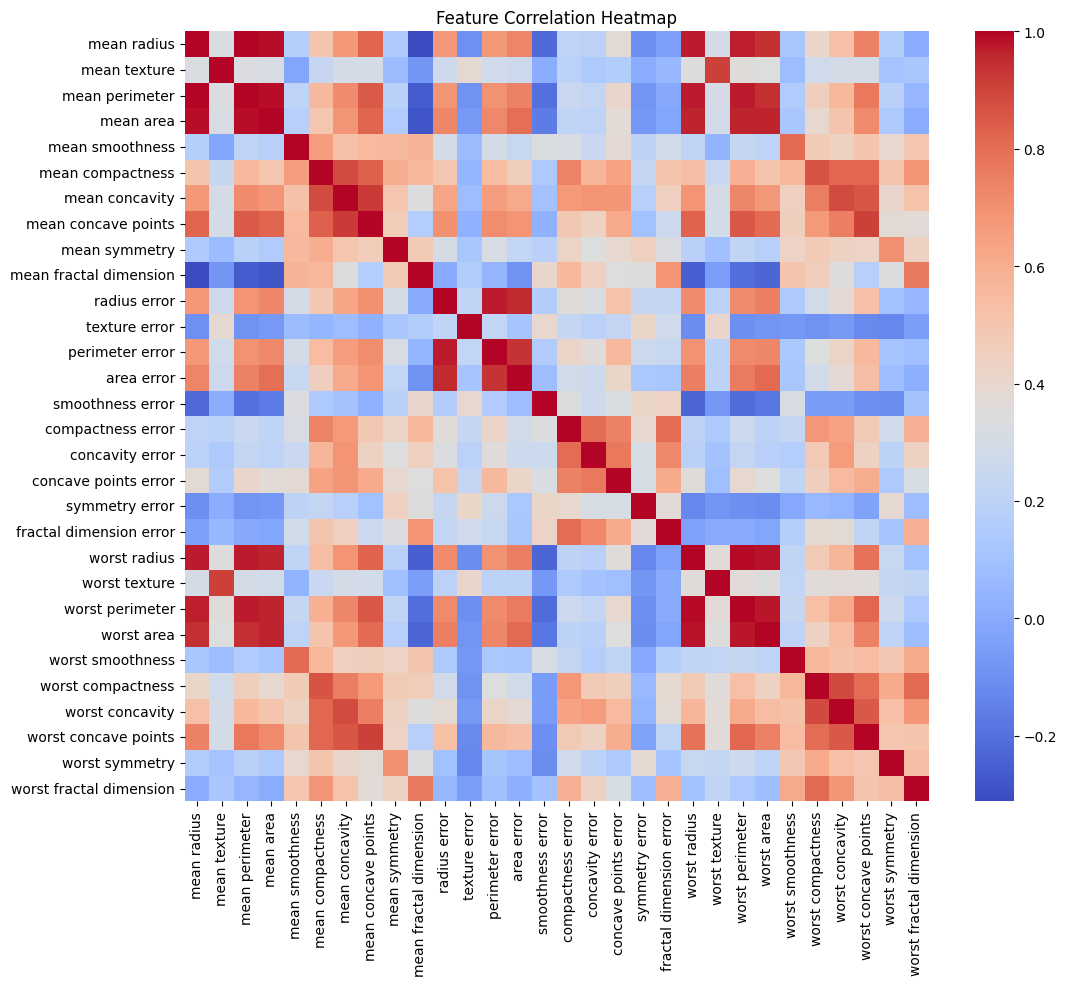

In [3]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

### Chi-Square Test

In [4]:
chi2_selector = SelectKBest(score_func=chi2, k=10)
X_chi2 = chi2_selector.fit_transform(X.abs(), y)  # chi2 requires non-negative values
selected_features_chi2 = X.columns[chi2_selector.get_support()]
print("Top features by Chi-Square:", selected_features_chi2.tolist())

Top features by Chi-Square: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area']


### ANOVA F-test


In [5]:
anova_selector = SelectKBest(score_func=f_classif, k=10)
X_anova = anova_selector.fit_transform(X, y)
selected_features_anova = X.columns[anova_selector.get_support()]
print("Top features by ANOVA F-test:", selected_features_anova.tolist())

Top features by ANOVA F-test: ['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points']


### Mutual Information


In [8]:
mi_selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_mi = mi_selector.fit_transform(X, y)
selected_features_mi = X.columns[mi_selector.get_support()]
print("Top features by Mutual Information:", selected_features_mi.tolist())

Top features by Mutual Information: ['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'area error', 'worst radius', 'worst perimeter', 'worst area', 'worst concave points']


## Wrapper Methods

In [9]:
# Using RFE (Recursive Feature Elimination) with Logistic Regression
logreg = LogisticRegression(max_iter=5000)
rfe = RFE(estimator=logreg, n_features_to_select=10)
rfe.fit(X, y)
selected_features_rfe = X.columns[rfe.support_]
print("Top features by RFE:", selected_features_rfe.tolist())

Top features by RFE: ['mean radius', 'mean compactness', 'mean concavity', 'texture error', 'worst radius', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry']


## Feature Importance using Random Forest

Top features by Random Forest Importance:
 worst area              0.131232
worst perimeter         0.126412
worst concave points    0.122751
mean concave points     0.096210
worst radius            0.088557
mean concavity          0.057358
mean perimeter          0.052340
mean area               0.051621
mean radius             0.039885
area error              0.038144
dtype: float64


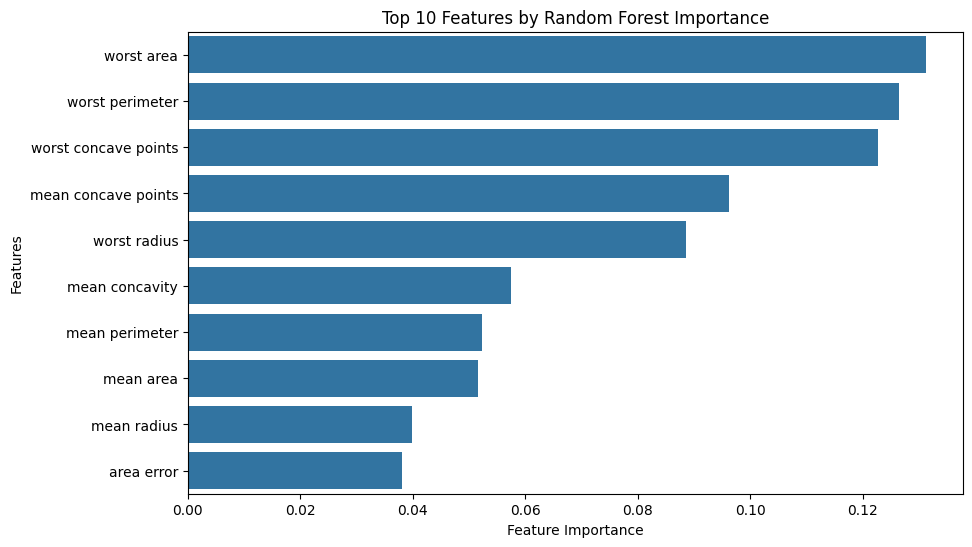

In [10]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)
top_features_rf = importances_sorted.head(10)
print("Top features by Random Forest Importance:\n", top_features_rf)

# Plot Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x=top_features_rf.values, y=top_features_rf.index)
plt.title("Top 10 Features by Random Forest Importance")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

## Model Accuracy Comparison

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X[top_features_rf.index], y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=500)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Accuracy using top features (RF):", accuracy_score(y_test, y_pred))


Accuracy using top features (RF): 0.9590643274853801
